
# <span style="color:rgb(213,80,0)">**Step\-by\-step modeling  with SimPhotonics\_FMM**</span>

# <span style="color:rgb(213,80,0)">Define the geometric parameters</span>

First of all, we define a "geom" structure with geometric parameters by using Gielis Superformula to create a mesh (see also [TutoSuperformula.mlx](./TutoSuperFormula.mlx)):    $\begin{array}{l} r\left(\varphi \right)={\left({\left(\frac{\cos \left(\frac{m\varphi }{4}\right)}{a}\right)}^{\textrm{n2}} +{\left(\frac{\sin \left(\frac{m\varphi }{4}\right)}{b}\right)}^{\textrm{n3}} \right)}^{\frac{-1}{\textrm{n1}}} \newline  \end{array}$


The different layers are defined from top to bottom.


In the case of homogeonous multilayer, "geom" is equal to the array of layer width (geom = \[h1,...,hp,...,hk\];).


In the genaral case, "geom" is setting by "SetGeom" function:


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; geom = SetGeom('Param1',Val1,'Param2',Val2,...);  (the order of parameters is not important)


In [1]:
%
geom = SetGeom();
%disp(geom.Help)  % List of geometric parameters

## **Main parameters**
-  dx & dy:   Period in x\-axis and y\-axis (µm), (for 1D\-grating, we only define 'dx')
-  hc:      Layer thickness \[hc\_1 ..hc\_i..\] (µm)
-  mn =  \[m, n1, n2, n3\]: Superformula parameters
-  ab:     Radius \[a b\] respectively in x and y (µm)

 **For homogeonous layer**


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; mn = \[ \]  or  \[4\]


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ab = \[ \]  or  \[dx/2 dy/2\]


 **For many inclusions in one layer**


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; mn = \[m\_1 n1\_1 n2\_1 n3\_1 ; m\_2 n1\_2 n2\_2 n3\_2; ...\]


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ab = \[a1 b1 ; a2 b2 ; ...\]


 **For multilayers**


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; mn = { \[ \] ... \[m\_1 n1\_1 n2\_1 n3\_1 ; m\_2 n1\_2 n2\_2 n3\_2; ...\] \[ \] ...}


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ab = {\[ \] ... \[a1 b1 ; a2 b2 ; ...\] ... \[ \]... }

## **Optional parameters**
-  Angle: Angle of inclusion rotation (rd)
-  Dep: Translation of inclusion in x and y (µm)
-  NumSD: Subdomain number of inclusions, otherwise 1 for all inclusions and the surrounding domain is numbered 2
-  Np: Number of points for inclusion drawing (Np = 401 by default)
-  Plot: =1: Plot particules, 0: no plot
## **Other parameters for meshing**
-  npx: Number of nodes in x (by default npx=2 as min value per inclusion)
-  npy: Number of nodes in y (as npx)
-  npz: Number of nodes in z, by default npz=2

For more information, see also [TutoGeomMesh.mlx](./TutoGeomMesh.mlx)


**Example: Bowtie nanoantenna + a layer**


In [2]:
dx = .4;      % Period in x-axis (µm)
dy = .4;      % Period in y-axis
h = [.05 .1]; % Layer thickness
w = .1;       % Width of a particle
e = .02;      % Gap between two particles

geom = SetGeom('dx',dx,'dy',dy,'hc',h,...
               'mn',{[4 2 2 2;3 3 6 6] []},...
               'ab',{[w w*2 ; w w]/2 []},...
               'Angle',{[0 pi] []},...
               'Dep',{[(w+e)/2 0; -(w+e)/2 0] []},...
               'npx',{[41 2] 2},'npy',{[21 2] 2},...
               'Plot',0); % Plot=1 to plot the structure

# <span style="color:rgb(213,80,0)">Create a mesh (discretization of the structure)</span>

The structure wil be meshed with cubic elements in order to associate mterial properties to different subdomains of the studied structure.

-  <u>*MeshLayer*</u> function: for 3D meshing
-  <u>*VisuMesh*</u> function: for plotting

see also [TutoGeomMesh.mlx](./TutoGeomMesh.mlx)



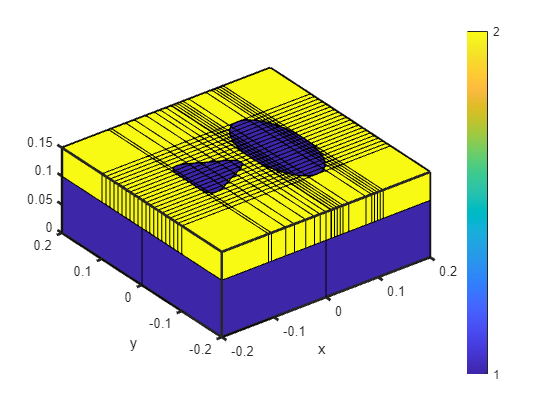

In [3]:
mesh = MeshLayer(geom);  % array of matlab structure
figure, VisuMesh(mesh)

In [4]:
% VisuMesh(mesh,number_of_subdomain,line_color,transparency)

# <span style="color:rgb(213,80,0)">Define refractive indices</span>

Refractive index data can be defined by the user as a scalar  value, array data or hundle function. We can use the SimPhotonics data library (56 materials in the file *IndexData.mat*) by calling <u>*IndexVal*</u> function (analytical function or interpolation of data array).

-  IndexVal(Name\_of\_material): hundle function versus wavelength
-  IndexVal(Name\_of\_material,x): Value of index for the wavelength value x

In [5]:
load IndexData.mat
disp(struct2table(Index))

       Name              n                  k                                                                    Fct                                                                                                                                                                                                                                                                            Ref                                                                                                                                                                                                              
    __________    _______________    _______________    ______________________________________________________________________________________________________________________    ____________________________________________________________________________________________________________________________________________________________________________________________________________________________________

In [6]:
IndexVal('BaTiO3')

ans = function_handle with value:
    @(x)sqrt(1+4.187./(1-(0.223./x).^2))

In [7]:
IndexVal({ 'Au' 'BK7'})


For a given structure, we define a variable "index" for each layer as a cell array. If a layer is a grating, the value of "index" is associated to the number of subdomain (check the mesh).


In the general case of a multilayer:


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; nsup: index of supstrat   \- (n1 ... nk): indices of multilayer   \-     nsub: index of substrat


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; i**ndex** = {nsup  n1 … {@np1 np2  … }…  nk   nsub };


Multilayer with constant indices:


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **index** = \[nsup n1 ... np ... nk nsub\]


In [8]:
% For Bowtie nanoantenna:
%         Air + Grating with Au particles + BK7 layer + Au substrat
index = {n_air {IndexVal('Au') n_air} IndexVal('BK7') IndexVal('Au')};


# <span style="color:rgb(213,80,0)">Spectrum calculation</span>

To calculate the spectrum (Reflectivity and transmittivity), we should define the parameters of the incident light: wavelength, incidence angle and the incidence medium (from top "+1" or from bottom "\-1"). and the number of Fourier terms (mx,my).


See also [TutoSpectrum.mlx](./TutoSpectrum.mlx)


**For homogeonous layer**


&nbsp;&nbsp;&nbsp;&nbsp; \[R\_tm,T\_tm,R\_te,T\_te\] = Spectrum(index,geom,lambda,theta,inc);    (mx=my=0 by default)


**For 1D grating**


&nbsp;&nbsp;&nbsp;&nbsp; \[R\_tm,T\_tm,R\_te,T\_te\] = Spectrum(index,geom,lambda,theta,inc,'mx',....)


**For 2D grating**


&nbsp;&nbsp;&nbsp;&nbsp; \[R\_tm,T\_tm,R\_te,T\_te\] = Spectrum(index,geom,lambda,theta,inc,'mx',....,'my', ....)


In [9]:

lambda = linspace(.5,.8,31);
theta = 0;
inc = +1;

% Without symmetry
[R_tm,T_tm,R_te,T_te] = Spectrum(index,geom,lambda,theta,inc,'mx',11,'my',11);

% With y-symmetry: SymY=0 for TM;  SymY=1 for TE
[R,T] = Spectrum(index,geom,lambda,theta,inc,'mx',11,'my',11,'SymY',0);

# <span style="color:rgb(213,80,0)">Field calculation</span>

For a giving value of wavelength and an incidence angle value, we can compute the electromagnetic field with <u>*Field*</u> function or <u>*CalculFieldFMM*</u> function (2 polarisation TM and TE) for a set of points (along a line or for a grid of points). We should compute the different S\-matrices of the multilayer and of the supstrat and substrat domains. The symmetry is not considered in this calculation.


See also [AntiReflectionCoating.mlx](./AntiReflectionCoating.mlx) and  [SPRBioSensorGrating2D.mx](./SPRBioSensorGrating2D.mlx)


In [10]:
[x,y,z] = deal(linspace(-dx/2,dx/2,100) , 0 , linspace(-0.5*sum(h),1.5*sum(h),101)); % (xoz)

% First method
% S-matrix calculation (without symmetry)
s = Spectrum(index,geom,lambda(1),theta(1),inc,'mx',8,'my',8);
% "s" is a matlab structure with fields (Mesh,Phys,Data,R_tem,T_tem,Sb,Sh,MatS,CoefD)

% Field calculation
[E,H] = CalculFieldFMM(s,x,y,z);

% Second method
%[E,H] = Field(index,geom,lambda(1),theta(1),inc,'mx',8,'my',8);

% Plot Field distribution
figure, VisuFieldFMM(abs(E(:,3)),x,y,z), axis tight,title('abs(Ez)')